In [1]:
import pandas as pd
train_fear_df = pd.read_csv("feartraindata.txt","\t")
test_fear_df = pd.read_csv("feartestdata.txt","\t")

In [2]:
from konlpy.tag import Okt
okt_fear = Okt()
okt_fear.pos(u'전람회 나간다')

[('전람회', 'Noun'), ('나간다', 'Verb')]

In [3]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_fear.pos(doc, norm=True, stem=True)]

In [4]:
train_fear_df.isnull().any()
train_fear_df['document'] = train_fear_df['document'].fillna('');
train_fear_df.isnull().any()
test_fear_df['document'] = test_fear_df['document'].fillna('');

In [5]:
train_fear_docs = [(tokenize(row[1]), row[2]) for row in train_fear_df.values]
test_fear_docs = [(tokenize(row[1]),row[2]) for row in test_fear_df.values]

In [6]:
print(train_fear_docs[0])
print(test_fear_docs[0])

(['언니/Noun', '동생/Noun', '으로/Josa', '부르다/Verb', '맞다/Verb', '일/Noun', '인가요/Josa', '..??/Punctuation'], 1)
(['톡/Noun', '크다/Verb', '언니/Noun', '들/Suffix', '임산부/Noun', '언니/Noun', '들/Suffix', 'ㅠㅠ/KoreanParticle'], 1)


In [7]:
tokens = [t for d in train_fear_docs for t in d[0]]
print("토큰개수:",len(tokens))

토큰개수: 71499


In [8]:
import nltk
fear_text = nltk.Text(tokens, name='NMSC')
print(len(fear_text.tokens))
print(len(set(fear_text.tokens)))
print(fear_text.vocab().most_common(10))

71499
10035
[('하다/Verb', 2516), ('이/Josa', 1385), ('./Punctuation', 1185), ('?/Punctuation', 1131), ('가/Josa', 1130), ('../Punctuation', 979), ('에/Josa', 908), ('.../Punctuation', 679), ('은/Josa', 676), ('도/Josa', 647)]


C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51008 missing from c

C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51008 missing from current fon

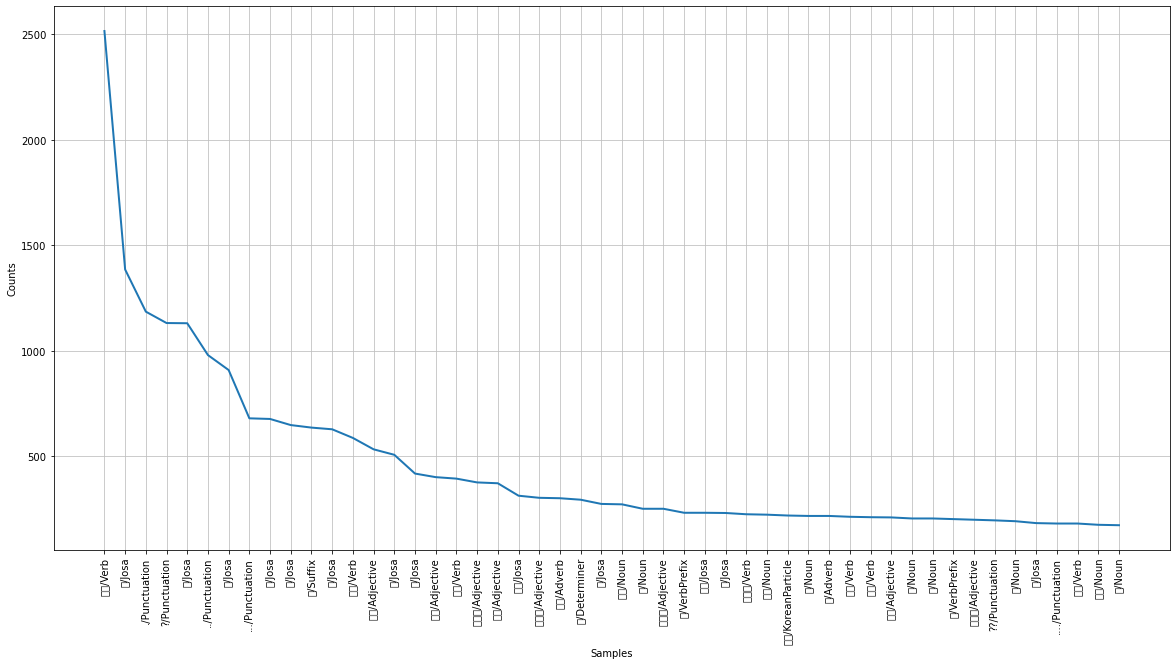

In [9]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
fear_text.plot(50)

In [10]:
FEAR_FREQUENCY_COUNT = 10000;
fear_selected_words = [f[0] for f in fear_text.vocab().most_common(FEAR_FREQUENCY_COUNT)]

In [11]:
def fear_term_frequency(doc):
    return [doc.count(word) for word in fear_selected_words]

In [12]:
x_fear_train = [fear_term_frequency(d) for d,_ in train_fear_docs]
x_fear_test = [fear_term_frequency(d) for d,_ in test_fear_docs]
y_fear_train = [c for _,c in train_fear_docs]
y_fear_test = [c for _,c in test_fear_docs]

In [13]:
import numpy as np
x_fear_train = np.asarray(x_fear_train).astype('float32')
x_fear_test = np.asarray(x_fear_test). astype('float32')

y_fear_train = np.asarray(y_fear_train).astype('float32')
y_fear_test = np.asarray(y_fear_test).astype('float32')

In [14]:
import tensorflow as tf
fear_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(FEAR_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [15]:
fear_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [16]:
fear_model.fit(x_fear_train, y_fear_train, epochs=50, batch_size=512)

Epoch 1/50
15/15 [==============================] - 0s 31ms/step - loss: 0.6658 - binary_accuracy: 0.6561
Epoch 2/50
15/15 [==============================] - 0s 30ms/step - loss: 0.5338 - binary_accuracy: 0.7823
Epoch 3/50
15/15 [==============================] - 0s 28ms/step - loss: 0.4151 - binary_accuracy: 0.8398
Epoch 4/50
15/15 [==============================] - 0s 29ms/step - loss: 0.3269 - binary_accuracy: 0.8768
Epoch 5/50
15/15 [==============================] - 0s 31ms/step - loss: 0.2595 - binary_accuracy: 0.9069
Epoch 6/50
15/15 [==============================] - 0s 30ms/step - loss: 0.2056 - binary_accuracy: 0.9332
Epoch 7/50
15/15 [==============================] - 0s 30ms/step - loss: 0.1624 - binary_accuracy: 0.9482
Epoch 8/50
15/15 [==============================] - 0s 30ms/step - loss: 0.1281 - binary_accuracy: 0.9609
Epoch 9/50
15/15 [==============================] - 0s 30ms/step - loss: 0.1006 - binary_accuracy: 0.9721
Epoch 10/50
15/15 [===========================

In [17]:
fear_results = fear_model.evaluate(x_fear_test, y_fear_test)

103/103 [==============================] - 0s 3ms/step - loss: 3.7547 - binary_accuracy: 0.6771


In [18]:
fear_results

[3.7547030448913574, 0.6771341562271118]

In [19]:
fear_model.save('fear_model.h5')

In [20]:
fear_review = "너무 무섭다"
fear_token = tokenize(fear_review)
fear_token

['너무/Adverb', '무섭다/Adjective']

In [21]:
tf = fear_term_frequency(fear_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(fear_model.predict(data))

0.9999995231628418

In [22]:
def fear_predict(predict):
    fear_token = tokenize(predict)
    fear_tfq = fear_term_frequency(fear_token)
    fear_data = np.expand_dims(np.asarray(fear_tfq).astype('float32'), axis=0)
    fear_score = float(fear_model.predict(fear_data))
    if(fear_score > 0.5):
        print(f"{predict} ==> 공포 ({round(fear_score*100)}%)")
    else:
        print(f"{predict} ==> 공포X ({round((1-fear_score)*100)}%)")

In [23]:
fear_predict("김은지 얼굴")

김은지 얼굴 ==> 공포 (88%)


In [24]:
#놀람 감정 분석

In [25]:
import pandas as pd
train_surprise_df = pd.read_csv("surprisetraindata.txt","\t")
test_surprise_df = pd.read_csv("surprisetestdata.txt","\t")

In [26]:
from konlpy.tag import Okt
okt_surprise = Okt()

In [27]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_surprise.pos(doc, norm=True, stem=True)]

In [28]:
train_surprise_df.isnull().any()
train_surprise_df['document'] = train_surprise_df['document'].fillna('');
train_surprise_df.isnull().any()
test_surprise_df['document'] = test_surprise_df['document'].fillna('');

In [29]:
train_surprise_docs = [(tokenize(row[1]), row[2]) for row in train_surprise_df.values]
test_surprise_docs = [(tokenize(row[1]),row[2]) for row in test_surprise_df.values]

In [30]:
print(train_surprise_docs[0])
print(test_surprise_docs[0])

(['언니/Noun', '동생/Noun', '으로/Josa', '부르다/Verb', '맞다/Verb', '일/Noun', '인가요/Josa', '..??/Punctuation'], 0)
(['톡/Noun', '크다/Verb', '언니/Noun', '들/Suffix', '임산부/Noun', '언니/Noun', '들/Suffix', 'ㅠㅠ/KoreanParticle'], 0)


In [31]:
tokens = [t for d in train_surprise_docs for t in d[0]]
print("토큰개수:",len(tokens))

토큰개수: 75323


In [32]:
import nltk
surprise_text = nltk.Text(tokens, name='NMSC')
print(len(surprise_text.tokens))
print(len(set(surprise_text.tokens)))
print(surprise_text.vocab().most_common(10))

75323
11199
[('하다/Verb', 2100), ('이/Josa', 1546), ('?/Punctuation', 1496), ('./Punctuation', 1182), ('가/Josa', 1176), ('에/Josa', 920), ('../Punctuation', 760), ('들/Suffix', 754), ('은/Josa', 744), ('.../Punctuation', 713)]


C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 12619 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44144 missing from cur

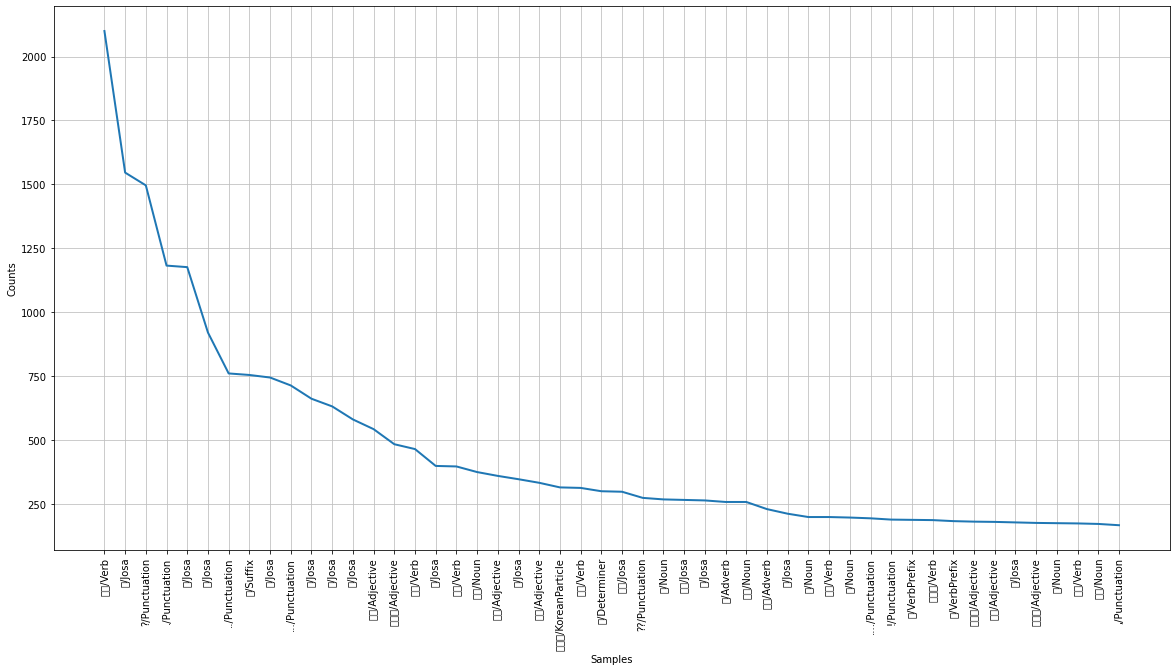

In [33]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
surprise_text.plot(50)

In [34]:
SURPRISE_FREQUENCY_COUNT = 10000;
surprise_selected_words = [f[0] for f in surprise_text.vocab().most_common(SURPRISE_FREQUENCY_COUNT)]

In [35]:
def surprise_term_frequency(doc):
    return [doc.count(word) for word in surprise_selected_words]

In [36]:
x_surprise_train = [surprise_term_frequency(d) for d,_ in train_surprise_docs]
x_surprise_test = [surprise_term_frequency(d) for d,_ in test_surprise_docs]
y_surprise_train = [c for _,c in train_surprise_docs]
y_surprise_test = [c for _,c in test_surprise_docs]

In [37]:
import numpy as np
x_surprise_train = np.asarray(x_surprise_train).astype('float32')
x_surprise_test = np.asarray(x_surprise_test). astype('float32')

y_surprise_train = np.asarray(y_surprise_train).astype('float32')
y_surprise_test = np.asarray(y_surprise_test).astype('float32')

In [38]:
import tensorflow as tf
surprise_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(SURPRISE_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [39]:
surprise_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [40]:
surprise_model.fit(x_surprise_train, y_surprise_train, epochs=50, batch_size=512)

Epoch 1/50
17/17 [==============================] - 0s 29ms/step - loss: 0.6640 - binary_accuracy: 0.6548
Epoch 2/50
17/17 [==============================] - 0s 29ms/step - loss: 0.5304 - binary_accuracy: 0.7779
Epoch 3/50
17/17 [==============================] - 0s 26ms/step - loss: 0.4128 - binary_accuracy: 0.8360
Epoch 4/50
17/17 [==============================] - 0s 29ms/step - loss: 0.3224 - binary_accuracy: 0.8765
Epoch 5/50
17/17 [==============================] - 0s 29ms/step - loss: 0.2510 - binary_accuracy: 0.9087
Epoch 6/50
17/17 [==============================] - 1s 29ms/step - loss: 0.1956 - binary_accuracy: 0.9306
Epoch 7/50
17/17 [==============================] - 0s 28ms/step - loss: 0.1528 - binary_accuracy: 0.9494
Epoch 8/50
17/17 [==============================] - 0s 29ms/step - loss: 0.1180 - binary_accuracy: 0.9662
Epoch 9/50
17/17 [==============================] - 0s 27ms/step - loss: 0.0924 - binary_accuracy: 0.9752
Epoch 10/50
17/17 [===========================

In [41]:
surprise_results = surprise_model.evaluate(x_surprise_test, y_surprise_test)

111/111 [==============================] - 0s 3ms/step - loss: 4.0428 - binary_accuracy: 0.6529


In [42]:
surprise_results

[4.0427632331848145, 0.6528878808021545]

In [43]:
surprise_model.save('surprise_model.h5')

In [44]:
surprise_review = "너무 놀랍다"
surprise_token = tokenize(surprise_review)
surprise_token

['너무/Adverb', '놀라다/Verb']

In [45]:
tf = surprise_term_frequency(surprise_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(surprise_model.predict(data))

0.9999723434448242

In [46]:
def surprise_predict(predict):
    surprise_token = tokenize(predict)
    surprise_tfq = surprise_term_frequency(surprise_token)
    surprise_data = np.expand_dims(np.asarray(surprise_tfq).astype('float32'), axis=0)
    surprise_score = float(surprise_model.predict(surprise_data))
    if(surprise_score > 0.5):
        print(f"{predict} ==> 놀람 ({round(surprise_score*100)}%)")
    else:
        print(f"{predict} ==> 놀람X ({round((1-surprise_score)*100)}%)")

In [47]:
surprise_predict("원재상")

원재상 ==> 놀람 (99%)


In [48]:
#분노 감정 분석

In [49]:
import pandas as pd
train_anger_df = pd.read_csv("angertraindata.txt","\t")
test_anger_df = pd.read_csv("angertestdata.txt","\t")

In [50]:
from konlpy.tag import Okt
okt_anger = Okt()

In [51]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_anger.pos(doc, norm=True, stem=True)]

In [52]:
train_anger_df.isnull().any()
train_anger_df['document'] = train_anger_df['document'].fillna('');
train_anger_df.isnull().any()
test_anger_df['document'] = test_anger_df['document'].fillna('');

In [53]:
train_anger_docs = [(tokenize(row[1]), row[2]) for row in train_anger_df.values]
test_anger_docs = [(tokenize(row[1]),row[2]) for row in test_anger_df.values]

In [54]:
print(train_anger_docs[0])
print(test_anger_docs[0])

(['언니/Noun', '동생/Noun', '으로/Josa', '부르다/Verb', '맞다/Verb', '일/Noun', '인가요/Josa', '..??/Punctuation'], 0)
(['톡/Noun', '크다/Verb', '언니/Noun', '들/Suffix', '임산부/Noun', '언니/Noun', '들/Suffix', 'ㅠㅠ/KoreanParticle'], 0)


In [55]:
tokens = [t for d in train_anger_docs for t in d[0]]
print("토큰개수:",len(tokens))

토큰개수: 77355


In [56]:
import nltk
anger_text = nltk.Text(tokens, name='NMSC')
print(len(anger_text.tokens))
print(len(set(anger_text.tokens)))
print(anger_text.vocab().most_common(10))

77355
10887
[('하다/Verb', 2380), ('./Punctuation', 1428), ('이/Josa', 1382), ('들/Suffix', 1197), ('가/Josa', 1008), ('?/Punctuation', 989), ('에/Josa', 967), ('을/Josa', 820), ('은/Josa', 807), ('../Punctuation', 676)]


C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48155 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48124 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50416 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47112 missing from c

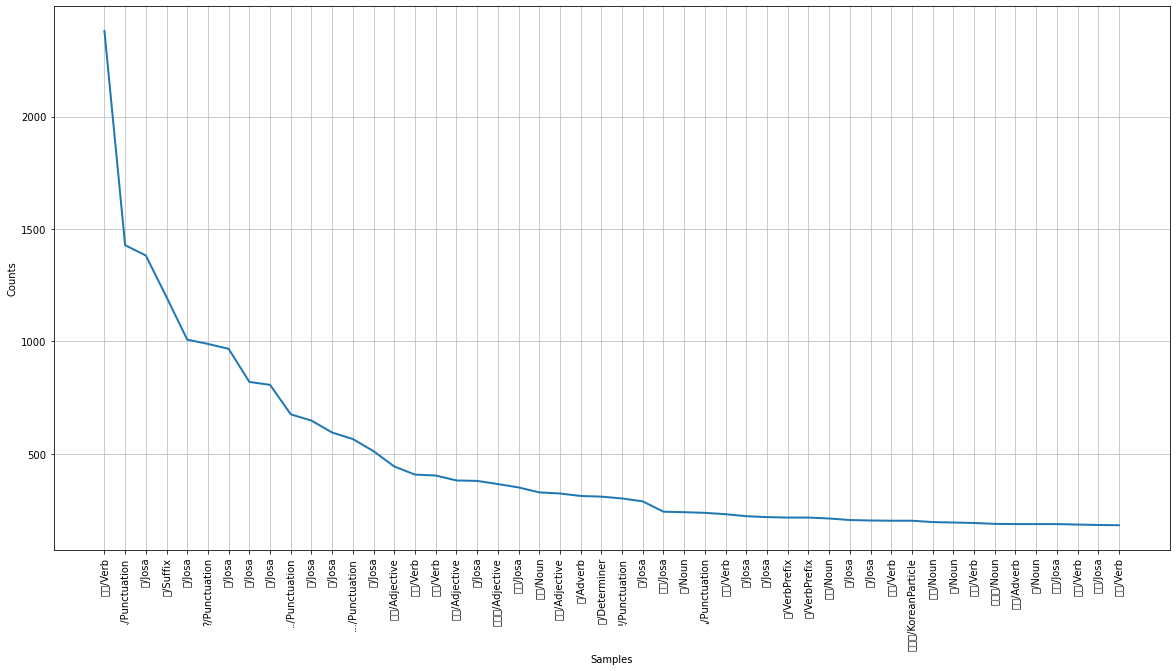

In [57]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
anger_text.plot(50)

In [58]:
ANGER_FREQUENCY_COUNT = 10000;
anger_selected_words = [f[0] for f in anger_text.vocab().most_common(ANGER_FREQUENCY_COUNT)]

In [59]:
def anger_term_frequency(doc):
    return [doc.count(word) for word in anger_selected_words]

In [60]:
x_anger_train = [anger_term_frequency(d) for d,_ in train_anger_docs]
x_anger_test = [anger_term_frequency(d) for d,_ in test_anger_docs]
y_anger_train = [c for _,c in train_anger_docs]
y_anger_test = [c for _,c in test_anger_docs]

In [61]:
import numpy as np
x_anger_train = np.asarray(x_anger_train).astype('float32')
x_anger_test = np.asarray(x_anger_test). astype('float32')

y_anger_train = np.asarray(y_anger_train).astype('float32')
y_anger_test = np.asarray(y_anger_test).astype('float32')

In [62]:
import tensorflow as tf
anger_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(ANGER_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [63]:
anger_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [64]:
anger_model.fit(x_anger_train, y_anger_train, epochs=50, batch_size=512)

Epoch 1/50
16/16 [==============================] - 0s 29ms/step - loss: 0.6520 - binary_accuracy: 0.6669
Epoch 2/50
16/16 [==============================] - 0s 29ms/step - loss: 0.4992 - binary_accuracy: 0.8144
Epoch 3/50
16/16 [==============================] - 0s 28ms/step - loss: 0.3876 - binary_accuracy: 0.8560
Epoch 4/50
16/16 [==============================] - 0s 27ms/step - loss: 0.3081 - binary_accuracy: 0.8877
Epoch 5/50
16/16 [==============================] - 0s 28ms/step - loss: 0.2457 - binary_accuracy: 0.9143
Epoch 6/50
16/16 [==============================] - 0s 29ms/step - loss: 0.1963 - binary_accuracy: 0.9338
Epoch 7/50
16/16 [==============================] - 1s 45ms/step - loss: 0.1562 - binary_accuracy: 0.9480
Epoch 8/50
16/16 [==============================] - 0s 28ms/step - loss: 0.1227 - binary_accuracy: 0.9608
Epoch 9/50
16/16 [==============================] - 0s 26ms/step - loss: 0.0963 - binary_accuracy: 0.9707
Epoch 10/50
16/16 [===========================

In [65]:
anger_results = anger_model.evaluate(x_anger_test, y_anger_test)

108/108 [==============================] - 0s 3ms/step - loss: 5.3435 - binary_accuracy: 0.6777


In [66]:
anger_results

[5.34346866607666, 0.6776546239852905]

In [67]:
anger_model.save('anger_model.h5')

In [68]:
anger_review = "너무 화난다"
anger_token = tokenize(anger_review)
anger_token

['너무/Adverb', '화나다/Verb']

In [69]:
tf = anger_term_frequency(anger_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(anger_model.predict(data))

1.0

In [70]:
def anger_predict(predict):
    anger_token = tokenize(predict)
    anger_tfq = anger_term_frequency(anger_token)
    anger_data = np.expand_dims(np.asarray(anger_tfq).astype('float32'), axis=0)
    anger_score = float(anger_model.predict(anger_data))
    if(anger_score > 0.5):
        print(f"{predict} ==> 분노 ({round(anger_score*100)}%)")
    else:
        print(f"{predict} ==> 분노X ({round((1-anger_score)*100)}%)")

In [71]:
anger_predict("짜증나")

짜증나 ==> 분노X (100%)


In [72]:
#슬픔 감정 분석

In [73]:
import pandas as pd
train_sadness_df = pd.read_csv("sadnesstraindata.txt","\t")
test_sadness_df = pd.read_csv("sadnesstestdata.txt","\t")

In [74]:
from konlpy.tag import Okt
okt_sadness = Okt()

In [75]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_sadness.pos(doc, norm=True, stem=True)]

In [76]:
x_sadness_train = [sadness_term_frequency(d) for d,_ in train_sadness_docs]
x_sadness_test = [sadness_term_frequency(d) for d,_ in test_sadness_docs]
y_sadness_train = [c for _,c in train_sadness_docs]
y_sadness_test = [c for _,c in test_sadness_docs]

NameError: name 'train_sadness_docs' is not defined

In [ ]:
import numpy as np
x_sadness_train = np.asarray(x_sadness_train).astype('float32')
x_sadness_test = np.asarray(x_sadness_test). astype('float32')

y_sadness_train = np.asarray(y_sadness_train).astype('float32')
y_sadness_test = np.asarray(y_sadness_test).astype('float32')

In [ ]:
train_sadness_docs = [(tokenize(row[1]), row[2]) for row in train_sadness_df.values]
test_sadness_docs = [(tokenize(row[1]),row[2]) for row in test_sadness_df.values]

In [ ]:
print(train_sadness_docs[0])
print(test_sadness_docs[0])

In [ ]:
tokens = [t for d in train_sadness_docs for t in d[0]]
print("토큰개수:",len(tokens))

In [ ]:
import nltk
sadness_text = nltk.Text(tokens, name='NMSC')
print(len(sadness_text.tokens))
print(len(set(sadness_text.tokens)))
print(sadness_text.vocab().most_common(10))

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
sadness_text.plot(50)

In [ ]:
SADNESS_FREQUENCY_COUNT = 10000;
sadness_selected_words = [f[0] for f in sadness_text.vocab().most_common(SADNESS_FREQUENCY_COUNT)]

In [ ]:
def sadness_term_frequency(doc):
    return [doc.count(word) for word in sadness_selected_words]

In [ ]:
x_sadness_train = [sadness_term_frequency(d) for d,_ in train_sadness_docs]
x_sadness_test = [sadness_term_frequency(d) for d,_ in test_sadness_docs]
y_sadness_train = [c for _,c in train_sadness_docs]
y_sadness_test = [c for _,c in test_sadness_docs]

In [ ]:
import numpy as np
x_sadness_train = np.asarray(x_sadness_train).astype('float32')
x_sadness_test = np.asarray(x_sadness_test). astype('float32')

y_sadness_train = np.asarray(y_sadness_train).astype('float32')
y_sadness_test = np.asarray(y_sadness_test).astype('float32')

In [ ]:
import tensorflow as tf
sadness_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(SADNESS_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
sadness_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [ ]:
sadness_model.fit(x_sadness_train, y_sadness_train, epochs=50, batch_size=512)

In [ ]:
sadness_results = sadness_model.evaluate(x_sadness_test, y_sadness_test)

In [ ]:
sadness_results

In [ ]:
sadness_model.save('sadness_model.h5')

In [ ]:
sadness_review = "너무 화난다"
sadness_token = tokenize(sadness_review)
sadness_token

In [ ]:
tf = sadness_term_frequency(sadness_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(sadness_model.predict(data))

In [ ]:
def sadness_predict(predict):
    sadness_token = tokenize(predict)
    sadness_tfq = sadness_term_frequency(sadness_token)
    sadness_data = np.expand_dims(np.asarray(sadness_tfq).astype('float32'), axis=0)
    sadness_score = float(sadness_model.predict(sadness_data))
    if(sadness_score > 0.5):
        print(f"{predict} ==> 분노 ({round(sadness_score*100)}%)")
    else:
        print(f"{predict} ==> 분노X ({round((1-sadness_score)*100)}%)")

In [ ]:
sadness_predict("원재상")

In [ ]:
#중립 감정 분석

In [ ]:
import pandas as pd
train_neutral_df = pd.read_csv("neutraltraindata.txt","\t")
test_neutral_df = pd.read_csv("neutraltestdata.txt","\t")

In [ ]:
from konlpy.tag import Okt
okt_neutral = Okt()

In [ ]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_neutral.pos(doc, norm=True, stem=True)]

In [ ]:
x_neutral_train = [neutral_term_frequency(d) for d,_ in train_neutral_docs]
x_neutral_test = [neutral_term_frequency(d) for d,_ in test_neutral_docs]
y_neutral_train = [c for _,c in train_neutral_docs]
y_neutral_test = [c for _,c in test_neutral_docs]

In [ ]:
import numpy as np
x_neutral_train = np.asarray(x_neutral_train).astype('float32')
x_neutral_test = np.asarray(x_neutral_test). astype('float32')

y_neutral_train = np.asarray(y_neutral_train).astype('float32')
y_neutral_test = np.asarray(y_neutral_test).astype('float32')

In [ ]:
train_neutral_docs = [(tokenize(row[1]), row[2]) for row in train_neutral_df.values]
test_neutral_docs = [(tokenize(row[1]),row[2]) for row in test_neutral_df.values]

In [ ]:
print(train_neutral_docs[0])
print(test_neutral_docs[0])

In [ ]:
tokens = [t for d in train_neutral_docs for t in d[0]]
print("토큰개수:",len(tokens))

In [ ]:
import nltk
neutral_text = nltk.Text(tokens, name='NMSC')
print(len(neutral_text.tokens))
print(len(set(neutral_text.tokens)))
print(neutral_text.vocab().most_common(10))

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
neutral_text.plot(50)

In [ ]:
NEUTRAL_FREQUENCY_COUNT = 10000;
neutral_selected_words = [f[0] for f in neutral_text.vocab().most_common(NEUTRAL_FREQUENCY_COUNT)]

In [ ]:
def neutral_term_frequency(doc):
    return [doc.count(word) for word in neutral_selected_words]

In [ ]:
x_neutral_train = [neutral_term_frequency(d) for d,_ in train_neutral_docs]
x_neutral_test = [neutral_term_frequency(d) for d,_ in test_neutral_docs]
y_neutral_train = [c for _,c in train_neutral_docs]
y_neutral_test = [c for _,c in test_neutral_docs]

In [ ]:
import numpy as np
x_neutral_train = np.asarray(x_neutral_train).astype('float32')
x_neutral_test = np.asarray(x_neutral_test). astype('float32')

y_neutral_train = np.asarray(y_neutral_train).astype('float32')
y_neutral_test = np.asarray(y_neutral_test).astype('float32')

In [ ]:
import tensorflow as tf
neutral_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(NEUTRAL_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
neutral_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [ ]:
neutral_model.fit(x_neutral_train, y_neutral_train, epochs=50, batch_size=512)

In [ ]:
neutral_results = neutral_model.evaluate(x_neutral_test, y_neutral_test)

In [ ]:
neutral_results

In [ ]:
neutral_model.save('neutral_model.h5')

In [ ]:
neutral_review = "너무 화난다"
neutral_token = tokenize(neutral_review)
neutral_token

In [ ]:
tf = neutral_term_frequency(neutral_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(neutral_model.predict(data))

In [ ]:
def neutral_predict(predict):
    neutral_token = tokenize(predict)
    neutral_tfq = neutral_term_frequency(neutral_token)
    neutral_data = np.expand_dims(np.asarray(neutral_tfq).astype('float32'), axis=0)
    neutral_score = float(neutral_model.predict(neutral_data))
    if(neutral_score > 0.5):
        print(f"{predict} ==> 분노 ({round(neutral_score*100)}%)")
    else:
        print(f"{predict} ==> 분노X ({round((1-neutral_score)*100)}%)")

In [ ]:
neutral_predict("원재상")

In [ ]:
#행복 감정 분석

In [ ]:
import pandas as pd
train_happy_df = pd.read_csv("happytraindata.txt","\t")
test_happy_df = pd.read_csv("happytestdata.txt","\t")

In [ ]:
from konlpy.tag import Okt
okt_happy = Okt()

In [ ]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_happy.pos(doc, norm=True, stem=True)]

In [ ]:
x_happy_train = [happy_term_frequency(d) for d,_ in train_happy_docs]
x_happy_test = [happy_term_frequency(d) for d,_ in test_happy_docs]
y_happy_train = [c for _,c in train_happy_docs]
y_happy_test = [c for _,c in test_happy_docs]

In [ ]:
import numpy as np
x_happy_train = np.asarray(x_happy_train).astype('float32')
x_happy_test = np.asarray(x_happy_test). astype('float32')

y_happy_train = np.asarray(y_happy_train).astype('float32')
y_happy_test = np.asarray(y_happy_test).astype('float32')

In [ ]:
train_happy_docs = [(tokenize(row[1]), row[2]) for row in train_happy_df.values]
test_happy_docs = [(tokenize(row[1]),row[2]) for row in test_happy_df.values]

In [ ]:
print(train_happy_docs[0])
print(test_happy_docs[0])

In [ ]:
tokens = [t for d in train_happy_docs for t in d[0]]
print("토큰개수:",len(tokens))

In [ ]:
import nltk
happy_text = nltk.Text(tokens, name='NMSC')
print(len(happy_text.tokens))
print(len(set(happy_text.tokens)))
print(happy_text.vocab().most_common(10))

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
happy_text.plot(50)

In [ ]:
HAPPY_FREQUENCY_COUNT = 10000;
happy_selected_words = [f[0] for f in happy_text.vocab().most_common(HAPPY_FREQUENCY_COUNT)]

In [ ]:
def happy_term_frequency(doc):
    return [doc.count(word) for word in happy_selected_words]

In [ ]:
x_happy_train = [happy_term_frequency(d) for d,_ in train_happy_docs]
x_happy_test = [happy_term_frequency(d) for d,_ in test_happy_docs]
y_happy_train = [c for _,c in train_happy_docs]
y_happy_test = [c for _,c in test_happy_docs]

In [ ]:
import numpy as np
x_happy_train = np.asarray(x_happy_train).astype('float32')
x_happy_test = np.asarray(x_happy_test). astype('float32')

y_happy_train = np.asarray(y_happy_train).astype('float32')
y_happy_test = np.asarray(y_happy_test).astype('float32')

In [ ]:
import tensorflow as tf
happy_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(HAPPY_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
happy_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [ ]:
happy_model.fit(x_happy_train, y_happy_train, epochs=50, batch_size=512)

In [ ]:
happy_results = happy_model.evaluate(x_happy_test, y_happy_test)

In [ ]:
happy_results

In [ ]:
happy_model.save('happy_model.h5')

In [ ]:
happy_review = "너무 화난다"
happy_token = tokenize(happy_review)
happy_token

In [ ]:
tf = happy_term_frequency(happy_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(happy_model.predict(data))

In [ ]:
def happy_predict(predict):
    happy_token = tokenize(predict)
    happy_tfq = happy_term_frequency(happy_token)
    happy_data = np.expand_dims(np.asarray(happy_tfq).astype('float32'), axis=0)
    happy_score = float(happy_model.predict(happy_data))
    if(happy_score > 0.5):
        print(f"{predict} ==> 행복 ({round(happy_score*100)}%)")
    else:
        print(f"{predict} ==> 행복X ({round((1-happy_score)*100)}%)")

In [ ]:
happy_predict("원재상")

In [ ]:
#혐오 감정 분석

In [ ]:
import pandas as pd
train_disgust_df = pd.read_csv("disgusttraindata.txt","\t")
test_disgust_df = pd.read_csv("disgusttestdata.txt","\t")

In [ ]:
from konlpy.tag import Okt
okt_disgust = Okt()

In [ ]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_disgust.pos(doc, norm=True, stem=True)]

In [ ]:
x_disgust_train = [disgust_term_frequency(d) for d,_ in train_disgust_docs]
x_disgust_test = [disgust_term_frequency(d) for d,_ in test_disgust_docs]
y_disgust_train = [c for _,c in train_disgust_docs]
y_disgust_test = [c for _,c in test_disgust_docs]

In [ ]:
import numpy as np
x_disgust_train = np.asarray(x_disgust_train).astype('float32')
x_disgust_test = np.asarray(x_disgust_test). astype('float32')

y_disgust_train = np.asarray(y_disgust_train).astype('float32')
y_disgust_test = np.asarray(y_disgust_test).astype('float32')

In [ ]:
train_disgust_docs = [(tokenize(row[1]), row[2]) for row in train_disgust_df.values]
test_disgust_docs = [(tokenize(row[1]),row[2]) for row in test_disgust_df.values]

In [ ]:
print(train_disgust_docs[0])
print(test_disgust_docs[0])

In [ ]:
tokens = [t for d in train_disgust_docs for t in d[0]]
print("토큰개수:",len(tokens))

In [ ]:
import nltk
disgust_text = nltk.Text(tokens, name='NMSC')
print(len(disgust_text.tokens))
print(len(set(disgust_text.tokens)))
print(disgust_text.vocab().most_common(10))

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
disgust_text.plot(50)

In [ ]:
DISGUST_FREQUENCY_COUNT = 10000;
disgust_selected_words = [f[0] for f in disgust_text.vocab().most_common(DISGUST_FREQUENCY_COUNT)]

In [ ]:
def disgust_term_frequency(doc):
    return [doc.count(word) for word in disgust_selected_words]

In [ ]:
x_disgust_train = [disgust_term_frequency(d) for d,_ in train_disgust_docs]
x_disgust_test = [disgust_term_frequency(d) for d,_ in test_disgust_docs]
y_disgust_train = [c for _,c in train_disgust_docs]
y_disgust_test = [c for _,c in test_disgust_docs]

In [ ]:
import numpy as np
x_disgust_train = np.asarray(x_disgust_train).astype('float32')
x_disgust_test = np.asarray(x_disgust_test). astype('float32')

y_disgust_train = np.asarray(y_disgust_train).astype('float32')
y_disgust_test = np.asarray(y_disgust_test).astype('float32')

In [ ]:
import tensorflow as tf
disgust_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(DISGUST_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
disgust_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [ ]:
disgust_model.fit(x_disgust_train, y_disgust_train, epochs=50, batch_size=512)

In [ ]:
disgust_results = neutral_model.evaluate(x_disgust_test, y_disgust_test)

In [ ]:
disgust_results

In [ ]:
disgust_model.save('disgust_model.h5')

In [ ]:
disgust_review = "너무 화난다"
disgust_token = tokenize(disgust_review)
disgust_token

In [ ]:
tf = disgust_term_frequency(disgust_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(disgust_model.predict(data))

In [ ]:
def disgust_predict(predict):
    disgust_token = tokenize(predict)
    disgust_tfq = disgust_term_frequency(disgust_token)
    disgust_data = np.expand_dims(np.asarray(disgust_tfq).astype('float32'), axis=0)
    disgust_score = float(disgust_model.predict(disgust_data))
    if(disgust_score > 0.5):
        print(f"{predict} ==> 분노 ({round(disgust_score*100)}%)")
    else:
        print(f"{predict} ==> 분노X ({round((1-disgust_score)*100)}%)")

In [ ]:
disgust_predict("원재상")

In [ ]:
fear_predict("김은지 얼굴")
surprise_predict("김은지 얼굴")
anger_predict("김은지 얼굴")
neutral_predict("김은지 얼굴")
sadness_predict("김은지 얼굴")
happy_predict("김은지 얼굴")
disgust_predict("김은지 얼굴")